In [73]:
from preprocessor import *
#reading the data
data = pd.read_csv('Training.csv' )

#sort the df by ascending years and descending hapiness scores
#data.sort_values(['Year','Happiness Score'],ascending=[True,False],inplace=True)

#display first 10 rows
#data.head(10)
df = data.loc[data['prognosis'] == 'Tuberculosis']
data.shape

(4920, 133)

                     symptoms
chills                    114
vomiting                  114
fatigue                   114
weight_loss               114
cough                     114
high_fever                114
breathlessness            114
sweating                  114
loss_of_appetite          120
mild_fever                120
yellowing_of_eyes         120
swelled_lymph_nodes       120
malaise                   120
phlegm                    120
chest_pain                120
blood_in_sputum           120


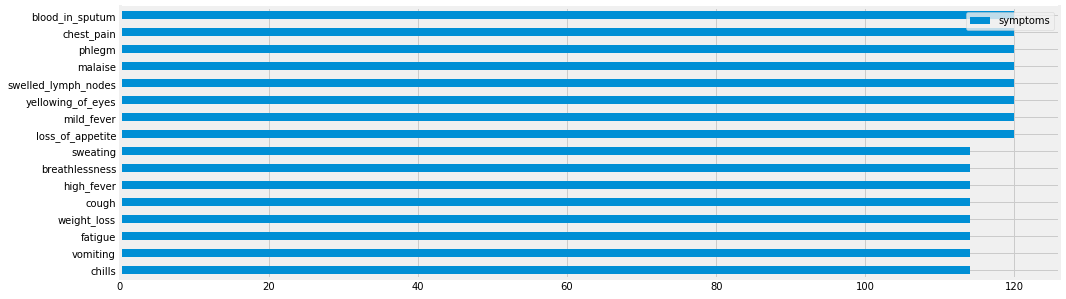

In [74]:
df = df.drop('prognosis',axis=1)
y= df.sum(axis=0,skipna=True)
k = pd.DataFrame(y,columns = ['symptoms'])

kx = k.loc[~(k['symptoms'] == 0)]
#kx.reset_index()
print(kx)
kx.plot.barh(figsize=(15,5));


In [30]:
no_prognosis = data.drop('prognosis',axis=1)

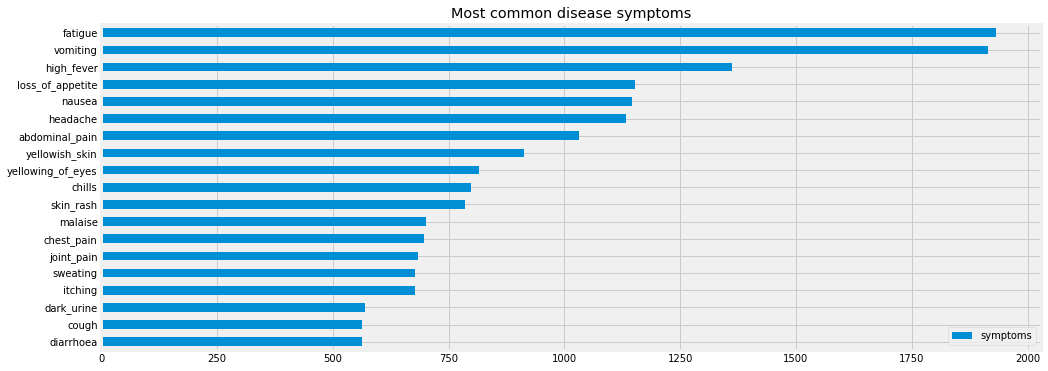

In [31]:

y= no_prognosis.sum(axis=0,skipna=True)
k = pd.DataFrame(y,columns = ['symptoms'])

kx = k.loc[~(k['symptoms'] == 0)]
many = kx[kx['symptoms'] >500]
many_sorted = many.sort_values(by='symptoms')
#kx.reset_index()
many_sorted.plot.barh(title = 'Most common disease symptoms',figsize=(15,6));


In [96]:
x = dict()
y = []
for symptom in data.columns:
    z = data.loc[(data[symptom] == 1)]
    x.setdefault(symptom,[]).append(list(z.prognosis.unique()))
        
x      


{'itching': [['Fungal infection',
   'Chronic cholestasis',
   'Drug Reaction',
   'Jaundice',
   'Chicken pox',
   'Hepatitis B']],
 'skin_rash': [['Fungal infection',
   'Drug Reaction',
   'Chicken pox',
   'Dengue',
   'Acne',
   'Psoriasis',
   'Impetigo']],
 'nodal_skin_eruptions': [['Fungal infection']],
 'continuous_sneezing': [['Allergy', 'Common Cold']],
 'shivering': [['Allergy']],
 'chills': [['Allergy',
   'Malaria',
   'Dengue',
   'Typhoid',
   'Tuberculosis',
   'Common Cold',
   'Pneumonia']],
 'joint_pain': [['Dengue',
   'hepatitis A',
   'Hepatitis D',
   'Hepatitis E',
   'Osteoarthristis',
   'Psoriasis']],
 'stomach_pain': [['GERD', 'Drug Reaction']],
 'acidity': [['GERD', 'Migraine']],
 'ulcers_on_tongue': [['GERD']],
 'muscle_wasting': [['AIDS']],
 'vomiting': [['GERD',
   'Chronic cholestasis',
   'Peptic ulcer diseae',
   'Gastroenteritis',
   'Paralysis (brain hemorrhage)',
   'Jaundice',
   'Malaria',
   'Dengue',
   'Typhoid',
   'hepatitis A',
   'Hepatit

In [98]:
dg = pd.DataFrame(x.items())
dg.head()

,0,1
0,itching,"[[Fungal infection, Chronic cholestasis, Drug ..."
1,skin_rash,"[[Fungal infection, Drug Reaction, Chicken pox..."
2,nodal_skin_eruptions,[[Fungal infection]]
3,continuous_sneezing,"[[Allergy, Common Cold]]"
4,shivering,[[Allergy]]


In [77]:
itching = data.loc[(data['chills'] == 1)]
list(itching.prognosis.unique())


['Allergy',
 'Malaria',
 'Dengue',
 'Typhoid',
 'Tuberculosis',
 'Common Cold',
 'Pneumonia']

In [34]:
# Task
'''
-Create a function that takes in a df and column and returns a dictionary of symptoms as keys and diseases as values
'''

(4920, 133)